In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./task3ML/task3ML/datasets/datatask3ML.csv')

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,deposit,y
0,59.0,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1.0,0.0,yes,no
1,56.0,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1.0,0.0,yes,no
2,41.0,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1.0,0.0,yes,no
3,55.0,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1.0,0.0,yes,no
4,54.0,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2.0,0.0,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96930,39.0,services,married,primary,no,179.0,yes,no,unknown,5.0,may,1778.0,1.0,0.0,no,no
96931,39.0,admin.,married,tertiary,no,0.0,yes,no,unknown,5.0,may,138.0,1.0,0.0,no,no
96932,39.0,student,single,tertiary,no,113.0,no,no,cellular,17.0,nov,266.0,1.0,0.0,yes,yes
96933,39.0,retired,married,secondary,no,2850.0,no,no,cellular,17.0,nov,300.0,1.0,8.0,no,yes


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
deposit      0
y            0
dtype: int64

In [7]:
df_features = df.drop(columns=['contact','day','month','duration','campaign','previous','y'])

In [8]:
df_features

,age,job,marital,education,default,balance,housing,loan,deposit
0,59.0,admin.,married,secondary,no,2343.0,yes,no,yes
1,56.0,admin.,married,secondary,no,45.0,no,no,yes
2,41.0,technician,married,secondary,no,1270.0,yes,no,yes
3,55.0,services,married,secondary,no,2476.0,yes,no,yes
4,54.0,admin.,married,tertiary,no,184.0,no,no,yes
...,...,...,...,...,...,...,...,...,...
96930,39.0,services,married,primary,no,179.0,yes,no,no
96931,39.0,admin.,married,tertiary,no,0.0,yes,no,no
96932,39.0,student,single,tertiary,no,113.0,no,no,yes
96933,39.0,retired,married,secondary,no,2850.0,no,no,no


In [9]:
# Define the categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'deposit']
numerical_cols = ['age', 'balance']

# Create a transformer for categorical columns (OneHotEncoding)
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create a transformer for numerical columns (StandardScaler)
numerical_transformer = StandardScaler()

# Combine the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply the transformations to the data
X = preprocessor.fit_transform(df_features)
# Convert the sparse matrix to a dense array
X_dense = X.toarray()

In [10]:
X_dense

array([[ 1.70886804, -0.22339086,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42670653, -0.29868169,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.01589897, -0.25854624,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.17220871, -0.29645376,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.17220871, -0.2067797 ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.17220871, -0.28361042,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [11]:
new_cols = ['age', 'balance', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'deposit_yes']
X_features = pd.DataFrame(X_dense, columns=new_cols)

In [12]:
X_features

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,deposit_yes
0,1.708868,-0.223391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.426707,-0.298682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.015899,-0.258546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.332653,-0.219033,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.238599,-0.294128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96930,-0.172209,-0.294291,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
96931,-0.172209,-0.300156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
96932,-0.172209,-0.296454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
96933,-0.172209,-0.206780,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
X_features.shape

(96935, 22)

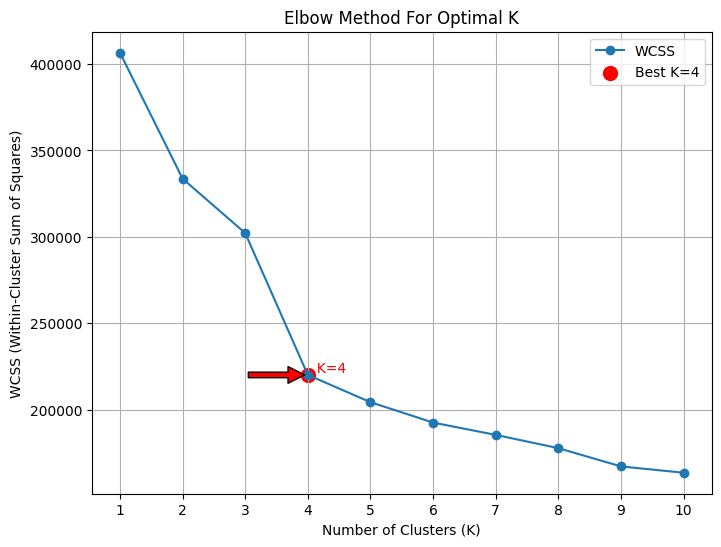

In [14]:
# Calculate WCSS for different values of K
wcss = []
for i in range(1, 11):  # Trying K from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', label='WCSS')
plt.xticks(range(1, 11))  # Corrected range to match the loop
plt.grid(True)
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Mark the point for K=4 and draw an arrow
best_k = 4
plt.scatter(best_k, wcss[best_k - 1], color='red', s=100, label=f'Best K={best_k}')
plt.text(best_k, wcss[best_k - 1], f'  K={best_k}', color='red', verticalalignment='bottom')

# Add an arrow pointing to the best K (K=4)
plt.annotate(
    '', 
    xy=(best_k, wcss[best_k - 1]), 
    xytext=(3, wcss[best_k - 1] + 10),  # Start of the arrow (you can adjust the offset)
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Show the plot with the legend
plt.legend()
plt.show()

In [15]:
# Calculate silhouette scores for different values of K
silhouette_scores = []
for i in range(2, 11):  # Silhouette score is only defined for K >= 2
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_features)
    score = silhouette_score(X_features, cluster_labels)
    silhouette_scores.append(score)

# Find the best K based on the highest silhouette score
best_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because the range starts at 2

# Plot Silhouette Scores for different values of K
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='b')
plt.title('Silhouette Score For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Add an arrow pointing to the best K
plt.annotate(
    '', 
    xy=(best_k_silhouette, max(silhouette_scores)), 
    xytext=(best_k_silhouette - 1, max(silhouette_scores) - 0.05),  # Start of the arrow, adjust offset
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Highlight the best K with a red dot and label
plt.scatter(best_k_silhouette, max(silhouette_scores), color='red', s=100)
plt.text(best_k_silhouette, max(silhouette_scores), f'  K={best_k_silhouette}', color='red', verticalalignment='bottom')

# Show the plot
plt.show()


KeyboardInterrupt: 

In [16]:
# Apply KMeans clustering with K=4 (or choose the number of clusters you think is appropriate)
kmeans = KMeans(n_clusters=4, random_state=42)
df_features['cluster'] = kmeans.fit_predict(X)

In [17]:
df_features

,age,job,marital,education,default,balance,housing,loan,deposit,cluster
0,59.0,admin.,married,secondary,no,2343.0,yes,no,yes,2
1,56.0,admin.,married,secondary,no,45.0,no,no,yes,2
2,41.0,technician,married,secondary,no,1270.0,yes,no,yes,1
3,55.0,services,married,secondary,no,2476.0,yes,no,yes,2
4,54.0,admin.,married,tertiary,no,184.0,no,no,yes,2
...,...,...,...,...,...,...,...,...,...,...
96930,39.0,services,married,primary,no,179.0,yes,no,no,1
96931,39.0,admin.,married,tertiary,no,0.0,yes,no,no,1
96932,39.0,student,single,tertiary,no,113.0,no,no,yes,0
96933,39.0,retired,married,secondary,no,2850.0,no,no,no,1


In [18]:
df_features['cluster'].value_counts()

cluster
1    36518
2    29298
0    24978
3     6141
Name: count, dtype: int64

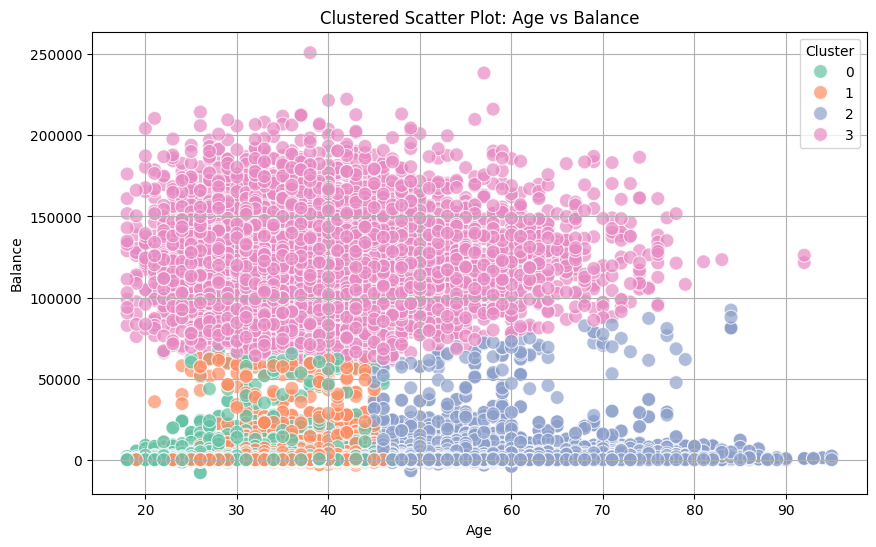

In [19]:
# Select only 'age' and 'balance' for clustering
plot = df_features[['age', 'balance']]

# Create scatter plot, color points by cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', hue='cluster', data=df_features, palette='Set2', alpha=0.7, s=100)

# Customize the plot
plt.title('Clustered Scatter Plot: Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [20]:
model_data = {
    'model': kmeans,
    'preprocessor': preprocessor
}

In [21]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

In [22]:
new_customer_data = pd.DataFrame({
    'age': [55.0],
    'job': ['services'],
    'marital': ['married'],
    'education': ['primary'],
    'default': ['no'],
    'balance': [179.0],
    'housing': ['yes'],
    'loan': ['no'],
    'deposit': ['no']
})

new_customer_transformed = preprocessor.transform(new_customer_data)
cluster = kmeans.predict(new_customer_transformed)

In [23]:
print(f"The new customer belongs to cluster: {cluster[0]}")

The new customer belongs to cluster: 2
